# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [28]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep = '\t')

### Step 4. See the first 10 entries

In [29]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [64]:
chipo['price'] = chipo.item_price.apply(lambda x:float(x[1:]))

In [66]:
chipo.head(2)

,order_id,quantity,item_name,choice_description,item_price,price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39


### Step 5. Create a histogram of the top 5 items bought

In [33]:
top5 = (chipo.groupby('item_name').sum()['quantity'].sort_values(ascending=False))[:5]

In [88]:
df = pd.DataFrame.from_dict(Counter(chipo.item_name),orient='index',)
df = df.sort_values(0,ascending=False)[:5]

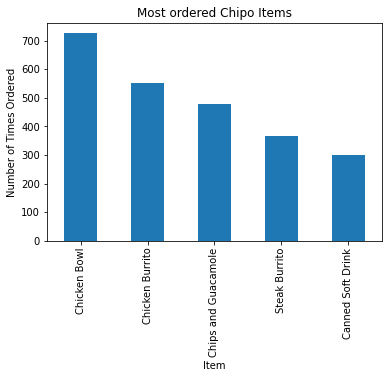

In [91]:
df.plot(kind='bar')
plt.xlabel('Item')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipo Items')
plt.legend().remove()
plt.show()

<AxesSubplot:ylabel='Frequency'>

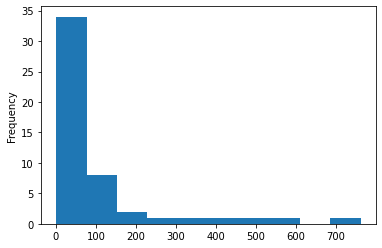

In [57]:
(chipo.groupby('item_name').sum()['quantity']).plot.hist()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

Text(0.5, 1.0, 'Number of items ordered per order price')

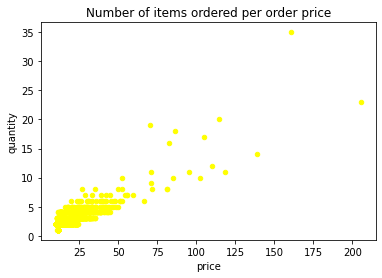

In [94]:
#x-axis = chipo['item_price']
#y-axis = chipo['item_name']
chipo_order = chipo.groupby('order_id').sum()
chipo_order.plot.scatter(x = 'price', y = 'quantity',c='yellow')
plt.title('Number of items ordered per order price')

### Step 7. BONUS: Create a question and a graph to answer your own question.